# GRIP : The Sparks Foundation

# TASK1 : Prediction Using Supervised Machine Learning

# Name : AKOJU HYMAVATHI

# OBJECTIVE

In [1]:
# 1. To predict the percentage of a student based on number of hours of study
# 2. predict the score if student studies for 9.25 hours/day

In [2]:
# We are using a simple linear regression model as it involves only two variables

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the data into DataFrame

In [5]:
df= pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
df.shape

(25, 2)

In [7]:
df.size

50

In [8]:
np.ndim(df)

2

# Check the null values

In [9]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
# No null values found in the data

In [11]:
# No categorical data found in the dataframe hence, no need to encode the data

# Visualize the outliers through box plot method

In [12]:
def visualize_outliers(dataframe):
    for i in dataframe.columns:
        if dataframe[i].dtypes=="float64" or dataframe[i].dtypes=="int64":
            sns.boxplot(y=i, data=df)
            plt.show()
    return "success"

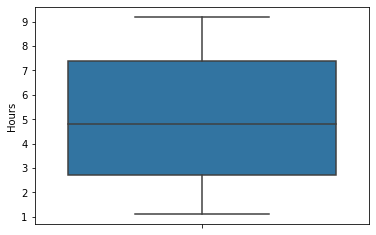

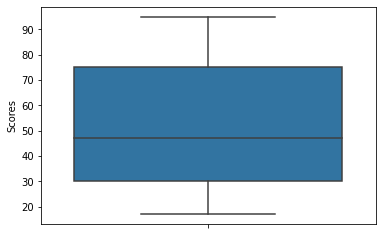

'success'

In [13]:
obj=visualize_outliers(df)
obj

In [14]:
# From above observation we can conclude that there are no outliers in the data

# Plotting the distribution of scores

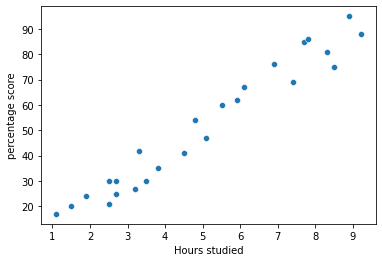

In [42]:
sns.scatterplot(x="Hours",y="Scores",data=df)
plt.title=("Hours vs scores")
plt.xlabel("Hours studied")
plt.ylabel("percentage score")
plt.show()

In [16]:
# From above graph we observe the positive linear relation between hours studied and percentage scored

# Training and Testing 

In [29]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [30]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [31]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [32]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [33]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [34]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [35]:
X_train.shape

(20, 1)

In [36]:
X_test.shape

(5, 1)

In [37]:
y_train.shape

(20,)

In [38]:
y_test.shape

(5,)

In [39]:
# The data is successfully split into training and testing sets

# Building ML model

# Training the model

In [47]:
from sklearn.linear_model import LinearRegression  
regression = LinearRegression()  
regression.fit(X_train, y_train) 

print("Training complete.")

Training complete.


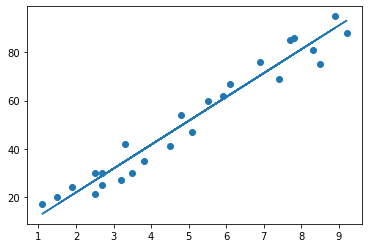

In [49]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# PREDICTIONS

In [60]:
pred_y=regression.predict(X_test)
prediction= pd.DataFrame({"Hours": [i[0] for i in X_test], "predicted_marks": [k for k in pred_y]})
prediction

,Hours,predicted_marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


# Comparing Actual and Predicted Scores

In [61]:
compare= pd.DataFrame({"Actual_score": y_test, "Predicted_score": pred_y})
compare

,Actual_score,Predicted_score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Model Evaluation

In [62]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

In [69]:
print(f"the mean absolute error is {mean_absolute_error(y_test,pred_y)}")

the mean absolute error is 4.183859899002975


In [70]:
# r2_score

In [72]:
from sklearn.metrics import r2_score
print(f"the r2 score is {r2_score(y_test,pred_y)}")

the r2 score is 0.9454906892105356


# What would be the predicted score if student studies for 9.25hours/day

In [67]:
Hours_studied= 9.25
score = regression.predict([[Hours_studied]])
print(f"The score obtained by a student{score}% if he/she studies for {Hours_studied}hours/day")

The score obtained by a student[93.69173249]% if he/she studies for 9.25hours/day
